In [2]:
import matplotlib.pyplot as plt
import numpy as np

Streaming output truncated to the last 5000 lines.
predicted y: [1.2395174290835929, 26.91848242672437]
temp: -0.002517645371647781
[-1.06431276677659, 0.8326184937889042, 0.7909875690994596, 0.6802493094255354]
-0.002517645371647781 0
predicted y: [1.2395426055373093, 26.919162190974713]
temp: 0.07935239825601137
[-1.06510629075915, 0.8326184937889042, 0.7909875690994596, 0.6802493094255354]
0.07935239825601137 0
predicted y: [1.238749081554749, 26.918368666992155]
temp: -0.003072458734393102
[-1.06510629075915, 0.8326492183762481, 0.7909875690994596, 0.6802493094255354]
-0.003072458734393102 0
predicted y: [1.2387798061420932, 26.918460840754186]
temp: -0.0029188357976746016
[-1.06510629075915, 0.8326492183762481, 0.7910167574574363, 0.6802493094255354]
-0.0029188357976746016 0
predicted y: [1.2388089945000698, 26.918723535975975]
temp: -0.002510198786003115
[-1.06510629075915, 0.8326492183762481, 0.7910167574574363, 0.6802744114133954]
-0.002510198786003115 0
predicted y: [1.2388340

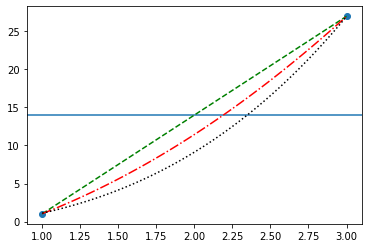

In [30]:
def get_points():
    # Return a dict of points (tuples) from user input
    # Ex. {2:3, 4:5}
    points = {}
    while True:
        point_input = input("Enter point (x, y) or \'done\': ")
        if point_input == 'done':
            break
        else:
            point_input = point_input.split(',')
            points[int(point_input[0])] = int(point_input[-1])
    return points

def find_equation_theta(point_dict):
    max_thetas = 4
    learning_rate = 0.01
    plot_points(point_dict)
    thetas = calculate_theta(point_dict, max_thetas, learning_rate)
    return thetas

def plot_points(point_dict):
    keys = list(point_dict.keys())
    values = list(point_dict.values())
    plt.plot(keys, values, 'o')

def calculate_theta(point_dict, max_thetas, learning_rate):
    return_thetas = []
    for i in range(4):
        # each loop calculates the appropriate theta for equations in the order of
        # linear (1 theta), linear (2 thetas), quadratic (3 thetas), cubic (4 thetas)
        theta_list = [0] * (i+1)
        x_values = list(point_dict.keys())
        x_vectors = [[x**k for k in range(i+1)] for x in x_values]
        predicted = []
        print(x_vectors)
        prev_convergence = 0
        convergence = 0
        while True:
            for j in range(len(theta_list)):
                predicted_y = [np.dot(theta_list, xv) for xv in x_vectors]
                predicted = list(predicted_y)
                print(f'predicted y: {predicted_y}')
                for k in range(len(predicted_y)):
                  predicted_y[k] -= point_dict[x_values[k]]
                  if j != 0:
                    predicted_y[k] *= x_values[k]
                temp = sum(predicted_y)/len(predicted_y)
                print(f'temp: {temp}')
                theta_list[j] -= learning_rate * temp
                print(theta_list)
                convergence = temp
                print(convergence, prev_convergence)
            if abs(convergence) < 0.001:
                break
        if i == 0:
          # plotting horizontal line
            plt.axhline(predicted[0])
        else:
            x = np.linspace(min(x_values), max(x_values))
            if i == 1:
                plt.plot(x, theta_list[1]*x + theta_list[0], '--g')
            elif i == 2:
                plt.plot(x, theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], '-.r')
            else:
                plt.plot(x, theta_list[3]*x**3 + theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], ':k')
        return_thetas.append(theta_list)
    return return_thetas
        
def give_lines(thetas):
    for t in thetas:
      if len(t) == 1:
        print(f'y = {t[0]} (Linear, solid blue)')
      elif len(t) == 2:
        print(f'y = {t[1]}x + {t[0]}, (Linear, dashed green)')
      elif len(t) == 3:
        print(f'y = {t[2]}x^2 + {t[1]}x + {t[0]}, (Quadratic, dashed-dot red)')
      else:
        print(f'y = {t[3]}x^3 + {t[2]}x^2 + {t[1]}x + {t[0]}, (Cubic, dotted black)')


point_dict = get_points()
if len(point_dict) > 0:
  thetas = find_equation_theta(point_dict)
  give_lines(thetas)
